 It uses algorithms from the popular machine learning package scikit-learn along with MLflow for tracking the model development process and Hyperopt to automate hyperparameter tuning.

In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
mlflow.set_tracking_uri("http://host.docker.internal:5000")

## Load and preprocess data

In [2]:
cal_housing = fetch_california_housing()
 
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2)


## Scale Data

In [3]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
mlflow.sklearn.autolog()

## Train Model

In [5]:
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
  
    # Set the model parameters. 
    n_estimators = 100
    max_depth = 6
    max_features = 3

    # Create and train model.
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
    rf.fit(X_train, y_train)

    # Use the model to make predictions on the test dataset.
    predictions = rf.predict(X_test) 

2022/12/12 05:49:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [6]:
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
 
search_space = {
  'max_depth': hp.quniform('max_depth', 2, 10, 1),
  'n_estimators': hp.quniform('n_estimators', 200, 1000, 100),
  'max_features': hp.quniform('max_features', 3, 8, 1),
}
 
def train_model(params):
   
    # Create and train model.
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
    rf.fit(X_train, y_train)

    predictions = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)

    return {"loss": mse, "status": STATUS_OK}
  
spark_trials =Trials()
 
with mlflow.start_run() as run:
    best_params = fmin(
        fn=train_model, 
        space=search_space, 
        algo=tpe.suggest, 
        max_evals=32,
        trials=spark_trials)

 19%|█▉        | 6/32 [00:21<01:32,  3.56s/trial, best loss: 0.40147786483740683]

2022/12/12 05:50:13 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 22%|██▏       | 7/32 [00:25<01:29,  3.56s/trial, best loss: 0.40147786483740683]

2022/12/12 05:50:17 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 25%|██▌       | 8/32 [00:28<01:25,  3.57s/trial, best loss: 0.40147786483740683]

2022/12/12 05:50:20 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 28%|██▊       | 9/32 [00:32<01:21,  3.55s/trial, best loss: 0.40147786483740683]

2022/12/12 05:50:24 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 31%|███▏      | 10/32 [00:35<01:18,  3.56s/trial, best loss: 0.40147786483740683]

2022/12/12 05:50:28 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 34%|███▍      | 11/32 [00:39<01:14,  3.55s/trial, best loss: 0.39997795162863903]

2022/12/12 05:50:31 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 38%|███▊      | 12/32 [00:42<01:10,  3.53s/trial, best loss: 0.39997795162863903]

2022/12/12 05:50:35 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 41%|████      | 13/32 [00:46<01:07,  3.54s/trial, best loss: 0.39997795162863903]

2022/12/12 05:50:38 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 44%|████▍     | 14/32 [00:49<01:03,  3.53s/trial, best loss: 0.39997795162863903]

2022/12/12 05:50:42 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 47%|████▋     | 15/32 [00:53<01:00,  3.58s/trial, best loss: 0.39981574272524284]

2022/12/12 05:50:45 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 50%|█████     | 16/32 [00:57<00:57,  3.57s/trial, best loss: 0.39981574272524284]

2022/12/12 05:50:49 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 53%|█████▎    | 17/32 [01:00<00:53,  3.55s/trial, best loss: 0.39981574272524284]

2022/12/12 05:50:52 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 56%|█████▋    | 18/32 [01:04<00:49,  3.53s/trial, best loss: 0.39981574272524284]

2022/12/12 05:50:56 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 59%|█████▉    | 19/32 [01:07<00:46,  3.56s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:00 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 62%|██████▎   | 20/32 [01:11<00:42,  3.56s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:03 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 66%|██████▌   | 21/32 [01:14<00:39,  3.58s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:07 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 69%|██████▉   | 22/32 [01:18<00:35,  3.59s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:10 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 72%|███████▏  | 23/32 [01:21<00:32,  3.57s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:14 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 75%|███████▌  | 24/32 [01:25<00:28,  3.56s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:17 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 78%|███████▊  | 25/32 [01:29<00:24,  3.57s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:21 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 81%|████████▏ | 26/32 [01:32<00:21,  3.57s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:25 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 84%|████████▍ | 27/32 [01:36<00:17,  3.58s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:28 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 88%|████████▊ | 28/32 [01:39<00:14,  3.58s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:32 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 91%|█████████ | 29/32 [01:43<00:10,  3.60s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:35 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 94%|█████████▍| 30/32 [01:47<00:07,  3.62s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:39 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



 97%|█████████▋| 31/32 [01:50<00:03,  3.60s/trial, best loss: 0.39981574272524284]

2022/12/12 05:51:43 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/b04c4c6b2a7846e9b88f383b89621a83/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.



100%|██████████| 32/32 [01:54<00:00,  3.57s/trial, best loss: 0.39981574272524284]


## Review the feature importances

In [7]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=cal_housing.feature_names, columns=['importance'])
feature_importances.sort_values('importance', ascending=False,inplace=True)
cm = sns.color_palette("blend:white,green", as_cmap=True)
feature_importances.style.background_gradient(cmap = cm,axis=None)

,importance
MedInc,0.563378
AveOccup,0.122732
AveRooms,0.098170
Latitude,0.095040
Longitude,0.069653
HouseAge,0.036857
AveBedrms,0.011167
Population,0.003004


# Build the final model

In [8]:
import hyperopt
 
print(hyperopt.space_eval(search_space, best_params))

{'max_depth': 3.0, 'max_features': 4.0, 'n_estimators': 200.0}


In [9]:
max_depth = int(hyperopt.space_eval(search_space, best_params)["max_depth"])
max_features = int(hyperopt.space_eval(search_space, best_params)["max_features"])
n_estimators = int(hyperopt.space_eval(search_space, best_params)["n_estimators"]) 

In [10]:
X_all_train = scaler.fit_transform(cal_housing.data)
y_all_train = cal_housing.target

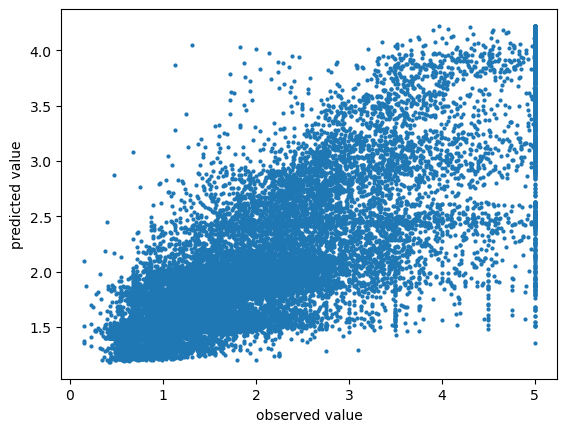

In [11]:
with mlflow.start_run() as run:
  
    rf_new = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
    rf_new.fit(X_all_train, y_all_train)

    # Save the run information to register the model later
    rf_uri = run.info.artifact_uri

    # Plot predicted vs known values for a quick visual check of the model and log the plot as an artifact
    rf_pred = rf_new.predict(X_all_train)
    plt.plot(y_all_train, rf_pred, "o", markersize=2)
    plt.xlabel("observed value")
    plt.ylabel("predicted value")
    plt.savefig("rfplot.png")
    mlflow.log_artifact("rfplot.png") 

In [12]:
import time
 
model_name = "rf_cal_housing"
model_uri = rf_uri+"/model"
new_model_version = mlflow.register_model(model_uri, model_name)
 
# Registering the model takes a few seconds, so add a delay before continuing with the next cell
time.sleep(5)

Successfully registered model 'rf_cal_housing'.
2022/12/12 05:51:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: rf_cal_housing, version 1
Created version '1' of model 'rf_cal_housing'.


## Load Model for Prediction

In [13]:
new_data = [[ 2.2 , -0.9,  1.05, -0.08, -0.34, 0.01,  0.74, -1.1],
            [ -0.9 , 2.6,  -1.4, -0.54, -0.86, 0.77,  0.35, -.08] ]
 
rf_model = mlflow.sklearn.load_model(f"models:/{model_name}/{new_model_version.version}")
preds = rf_model.predict(new_data)
preds

array([3.88205252, 1.46732287])